# 0. Load Libraries

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd


# 1. Import Data

In [6]:
colombia_og = pd.read_csv("/content/drive/MyDrive/Clases/data/Colombia/Casos_positivos_de_COVID-19_en_Colombia.csv")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,17,19,20,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#2. Pre-processing

In [33]:
colombia = colombia_og[['ID de caso','Sexo', 'Edad', 'Fecha de inicio de síntomas', 'Fecha de muerte']]
colombia.columns = ['id', 'sex', 'age', 'symptoms_date', 'death_date']

In [34]:
colombia = colombia.dropna()
colombia = colombia.iloc[0:100,:]
colombia

,id,sex,age,symptoms_date,death_date
151,152,M,65,10/3/2020 0:00:00,5/4/2020 0:00:00
152,153,F,53,18/3/2020 0:00:00,6/4/2020 0:00:00
156,157,M,88,12/3/2020 0:00:00,23/3/2020 0:00:00
187,188,F,70,8/3/2020 0:00:00,22/3/2020 0:00:00
196,197,M,58,6/3/2020 0:00:00,16/3/2020 0:00:00
...,...,...,...,...,...
1499,1500,F,88,30/3/2020 0:00:00,12/4/2020 0:00:00
1504,1505,M,59,21/3/2020 0:00:00,12/4/2020 0:00:00
1513,1514,F,91,20/3/2020 0:00:00,3/4/2020 0:00:00
1531,1532,M,76,20/3/2020 0:00:00,14/4/2020 0:00:00


In [35]:
#Convert Sex to numeric
colombia['sex'] = (colombia['sex']=="F")*1

#Calculate date difference
colombia['death_date'] = pd.to_datetime(colombia['death_date'])
colombia['symptoms_date'] = pd.to_datetime(colombia['symptoms_date'])
colombia['time_to_death'] = (colombia['death_date'] - colombia['symptoms_date']) / np.timedelta64(-1, 'D')
colombia = colombia[['id','sex', 'age', 'time_to_death']]
colombia

,id,sex,age,time_to_death
151,152,0,65,152.0
152,153,1,53,-78.0
156,157,0,88,255.0
187,188,1,70,134.0
196,197,0,58,79.0
...,...,...,...,...
1499,1500,1,88,-249.0
1504,1505,0,59,-258.0
1513,1514,1,91,16.0
1531,1532,0,76,-25.0


# 3. Run algorithm

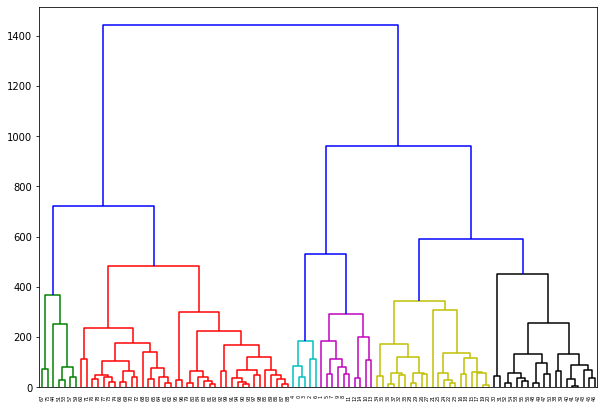

In [45]:
linked = linkage(colombia, method='complete', metric='euclidean')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            color_threshold=500,
            #labels = colombia['id'],
            distance_sort='descending')
plt.show()